In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [45]:
data = pd.read_csv('data.csv')
print(data.head())
data.drop('Unnamed: 32',inplace=True,axis=1)
headers = np.array(data.columns)


print(data.describe())
print(data.info())

print(data.isnull().sum())
print(data.isna().sum())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [46]:
#change output values to numerical
data['diagnosis'] = data['diagnosis'].replace(['B','M'], [0,1])

In [47]:
X = data[headers[2:]]
Y = data[headers[1]]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [48]:
# StandardScaling

sc = StandardScaler()

sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [49]:

# for finding best value of the num of neighbors
def modeling(k):
  knn_model = KNeighborsClassifier(n_neighbors = k, p=2, metric = 'euclidean')
  knn_model.fit(X_train, Y_train)
  Y_predict = knn_model.predict(X_test)
  cm = confusion_matrix(Y_test, Y_predict)
  accuracy = (cm[0, 0] + cm[1, 1])/np.sum(cm)
  return(accuracy)

/Users/samir/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/samir/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

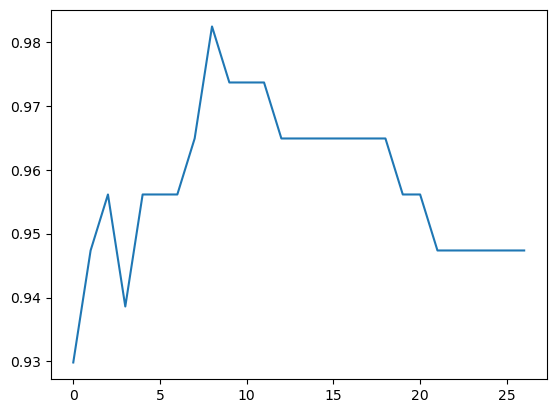

In [50]:
# result of each k value
results = []
for i in range(3, 30):
  results.append(modeling(i))
plt.plot(results)
plt.show()



In [51]:
#model building
model = KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

/Users/samir/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
# accuracy check
cm = confusion_matrix(Y_test,Y_pred)
print('confusion_matrix: ',cm)

print('f1_score: ', f1_score(Y_test,Y_pred))

# accuracy = (cm[0, 0]+cm[1, 1])/np.sum(cm)
print('knn accuracy_score: ', accuracy_score(Y_test,Y_pred))

confusion_matrix:  [[70  1]
 [ 4 39]]
f1_score:  0.9397590361445783
knn accuracy_score:  0.956140350877193
